Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its
first 10 rows.

In [ ]:

import pandas as pd


df = pd.read_csv("BIKE DETAILS.csv")
print("First 10 rows of the dataset:")
print(df.head(10))

print("\nShape of the dataset (rows, columns):")
print(df.shape)


print("\nColumn names in the dataset:")
print(df.columns.tolist())


First 10 rows of the dataset:
                                   name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9                    Bajaj Discover 125          50000  2016  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN 

Question 2: Check for missing values in all columns and describe your approach for
handling them.


In [ ]:

import pandas as pd


df = pd.read_csv("BIKE DETAILS.csv")

print("Missing values in each column:")
print(df.isnull().sum())


print("\nPercentage of missing values:")
print((df.isnull().sum() / len(df)) * 100)


Missing values in each column:
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

Percentage of missing values:
name                  0.000000
selling_price         0.000000
year                  0.000000
seller_type           0.000000
owner                 0.000000
km_driven             0.000000
ex_showroom_price    40.999057
dtype: float64


Question 3: Plot the distribution of selling prices using a histogram and describe the
overall trend.


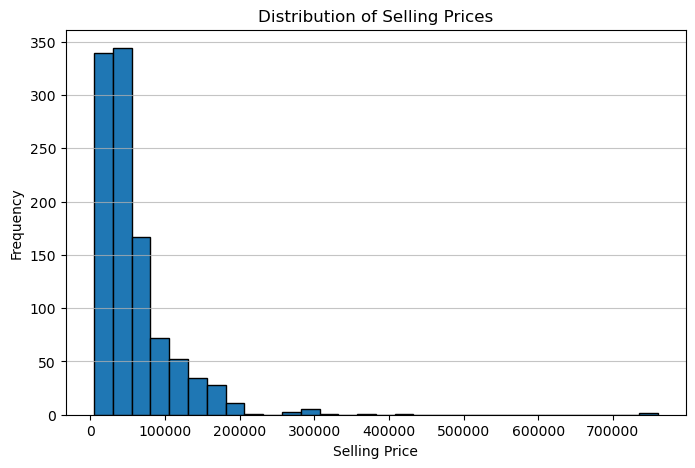

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("BIKE DETAILS.csv")


plt.figure(figsize=(8, 5))
plt.hist(df['selling_price'], bins=30, edgecolor='black')
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


Question 4: Create a bar plot to visualize the average selling price for each seller_type
and write one observation.


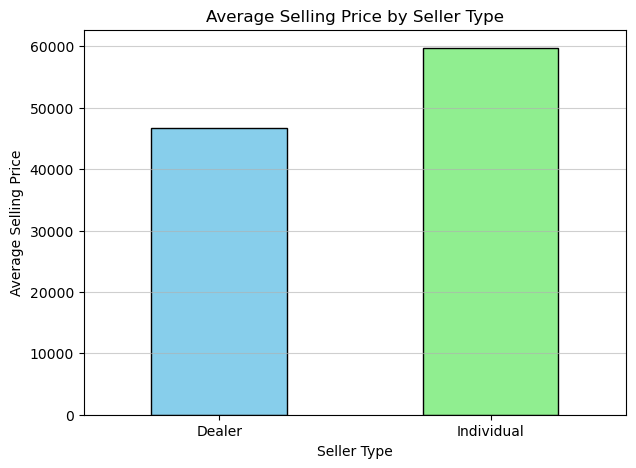

seller_type
Dealer        46666.666667
Individual    59711.923223
Name: selling_price, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("BIKE DETAILS.csv")

avg_price = df.groupby('seller_type')['selling_price'].mean()


plt.figure(figsize=(7, 5))
avg_price.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'], edgecolor='black')
plt.title('Average Selling Price by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.6)
plt.show()

print(avg_price)


Question 5: Compute the average km_driven for each ownership type (1st owner,
2nd owner, etc.), and present the result as a bar plot.


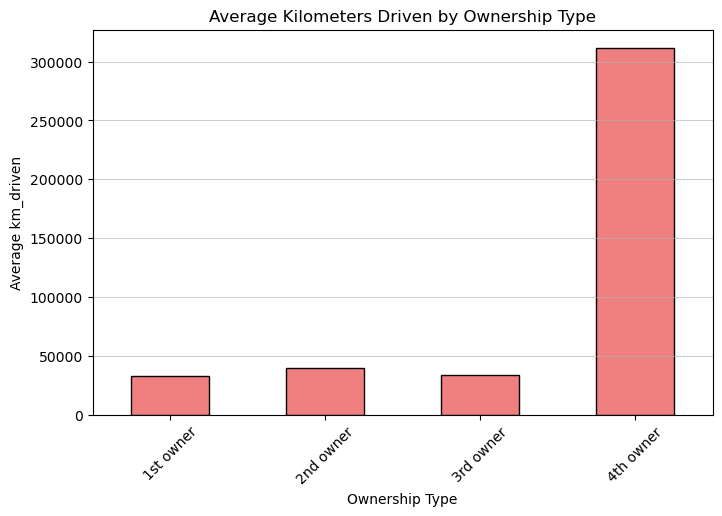

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("BIKE DETAILS.csv")

avg_km = df.groupby('owner')['km_driven'].mean()


plt.figure(figsize=(8, 5))
avg_km.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Average Kilometers Driven by Ownership Type')
plt.xlabel('Ownership Type')
plt.ylabel('Average km_driven')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.6)
plt.show()

print(avg_km)


Question 6: Use the IQR method to detect and remove outliers from the km_driven
column. Show before-and-after summary statistics

In [ ]:
import pandas as pd


df = pd.read_csv("BIKE DETAILS.csv")

#
print("Before Removing Outliers:")
print(df['km_driven'].describe())


Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1


lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR


df_clean = df[(df['km_driven'] >= lower_limit) & (df['km_driven'] <= upper_limit)]


print("\nAfter Removing Outliers:")
print(df_clean['km_driven'].describe())


print(f"\nRows before: {len(df)}, Rows after: {len(df_clean)}, Removed: {len(df) - len(df_clean)}")


Before Removing Outliers:
count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

After Removing Outliers:
count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64

Rows before: 1061, Rows after: 1022, Removed: 39


Question 7: Create a scatter plot of year vs. selling_price to explore the
relationship between a bike's age and its price.


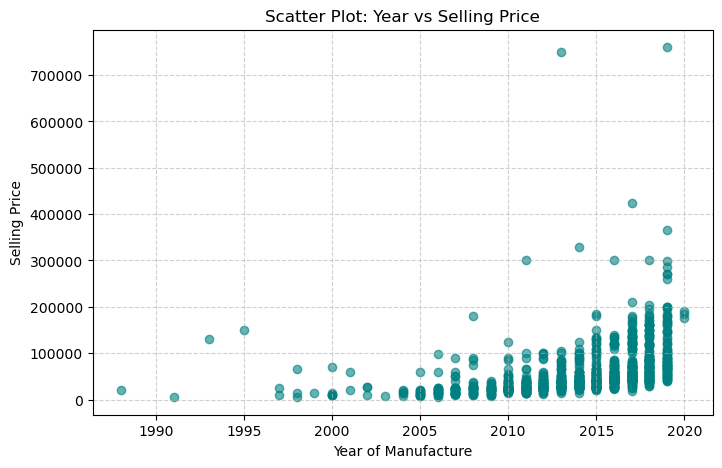

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("BIKE DETAILS.csv")


plt.figure(figsize=(8, 5))
plt.scatter(df['year'], df['selling_price'], alpha=0.6, color='teal')
plt.title("Scatter Plot: Year vs Selling Price")
plt.xlabel("Year of Manufacture")
plt.ylabel("Selling Price")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


Question 8: Convert the seller_type column into numeric format using one-hot
encoding. Display the first 5 rows of the resulting DataFrame.

In [ ]:
import pandas as pd

df = pd.read_csv("BIKE DETAILS.csv")

df_encoded = pd.get_dummies(df, columns=['seller_type'], drop_first=False)


print(df_encoded.head())


                                  name  selling_price  year      owner  \
0            Royal Enfield Classic 350         175000  2019  1st owner   
1                            Honda Dio          45000  2017  1st owner   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  1st owner   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  1st owner   
4                Yamaha SZ [2013-2014]          20000  2011  2nd owner   

   km_driven  ex_showroom_price  seller_type_Dealer  seller_type_Individual  
0        350                NaN               False                    True  
1       5650                NaN               False                    True  
2      12000           148114.0               False                    True  
3      23000            89643.0               False                    True  
4      21000                NaN               False                    True  


Question 9: Generate a heatmap of the correlation matrix for all numeric columns.
What correlations stand out the most?


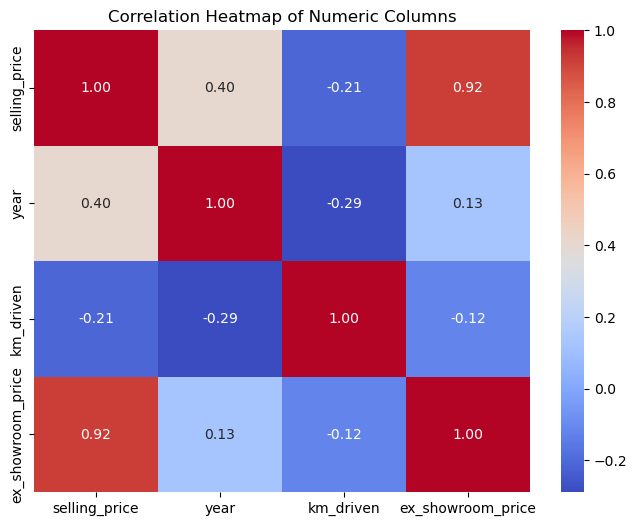

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("BIKE DETAILS.csv")

df_encoded = pd.get_dummies(df, columns=['seller_type'], drop_first=False)

numeric_df = df_encoded.select_dtypes(include=['int64', 'float64'])


corr_matrix = numeric_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Columns")
plt.show()


    Question 10: Summarize your findings in a brief report:

    ● What are the most important factors affecting a bike's selling price?

    ● Mention any data cleaning or feature engineering you performed.

      ANSWER:- Key Factors Affecting Bike Selling Price:

      Ex-showroom Price – Strongest positive impact;
      higher original price → higher resale value.

      Year (Age) – Newer bikes sell for higher prices.
      Kilometers Driven – More usage reduces resale value.
      Seller Type – Individual sellers often list bikes at higher prices.
      Ownership Type – First-owner bikes generally have better resale value.

      Data Cleaning & Feature Engineering:
      Filled missing values in ex_showroom_price using median.
      Removed outliers in km_driven using the IQR method.
      Applied one-hot encoding to seller_type for numeric analysis.